# Projet 'Température Terrestre'

## 4. **Data Visualization**

Cette partie consiste à représenter graphiquement les données pour faciliter leur compréhension et mettre en évidence les tendances, les modèles et les relations entre les différents éléments.
Pour cela on a utilisé la bibliothéque Plotly, pour avoir des visualisations interactives.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [10]:
df=pd.read_csv("./merged_owid_temp.csv", index_col=0)

In [11]:
### Émission mondiale de CO2 ###
world_co2=df.loc[df['year']>=1950] #Pour avoir le minimum de valeurs manquantes
fig = px.choropleth(world_co2, locations='iso_code',color= 'co2',
                    animation_frame= 'year',
                    hover_name= 'country',
                    color_continuous_scale='pubu', # couleurs à tester : amp, Blues, Reds, pubu, bluered, orrd, ylorrd
                    projection ='natural earth',
                    title='Émissions mondiales de CO2',
                    range_color=(0, 12000))
fig. update_layout(geo=dict(showframe=False, showcoastlines=False), title=dict(x=0.5,font=dict(size=20)), height=600, width=800)
fig.update_coloraxes(colorbar=dict(x=1, y=0.5,len=1, tickfont=dict(size=10),title = "CO2 (MT)"))

fig.show()

**Analyse :**

En observant la carte interactive, nous pouvons remarquer que les émissions de CO2 ont augmenté de manière constante depuis 1950. Les pays ayant les émissions les plus élevées sont les États-Unis, la Chine, l'Inde, la Russie et le Japon. Ces pays ont des émissions de CO2 plusieurs fois plus élevées que d'autres pays de la carte, ce qui indique que la majeure partie de l'émission de CO2 dans le monde provient de ces pays.

Nous pouvons également observer que les émissions de CO2 ont connu une augmentation rapide à partir du milieu des années 1950 et ont augmenté de manière plus prononcée à partir des années 2000. Cette augmentation rapide peut être liée à l'augmentation de la population mondiale et à l'augmentation de la demande d'énergie pour les transports, la production manufacturière et l'électricité.

Cependant, il existe également des différences régionales dans les émissions de CO2. L'Amérique du Nord, l'Europe et l'Asie ont des émissions plus élevées que l'Afrique et l'Amérique latine. Cela peut être dû à des facteurs tels que les niveaux de développement économique, les politiques environnementales et les sources d'énergie employées.

In [12]:
### Émission mondiale de CO2 par habitant ###
fig = px.choropleth(world_co2, locations='iso_code',color= 'co2_per_capita',
                    animation_frame= 'year',
                    hover_name= 'country',
                    color_continuous_scale='pubu',
                    projection ='natural earth',
                    title='Émission mondiale de CO2 par habitant',
                    range_color=(0, 50))
fig. update_layout(geo=dict(showframe=False, showcoastlines=False),title=dict(x=0.5,font=dict(size=15)),height=600, width=800)
fig.update_coloraxes(colorbar=dict(x=1, y=0.5,len=1, tickfont=dict(size=10),title = "CO2 (Tonnes)"))

fig.show()

**Analyse :**

En observant la carte interactive pour l'émission de CO2 par habitant de 1951 à 2022, nous pouvons remarquer rapidement que les pays ayant les émissions de CO2 par habitant les plus élevées sont les États-Unis, le Canada, l'Australie, mais aussi - il vaut mieux zoomer pour les voir - les pays du golf persique (Qatar, Koweït, Emirats Arabes Unis, Oman et Arabie saoudite). Cependant, si l'on compare les émissions de CO2 par habitant entre les pays à différents moments du temps, il est également possible de voir des changements importants.
Par exemple, nous pouvons constater que certains pays ont réduit leurs émissions de CO2 par habitant au fil du temps. Cette baisse peut être due à des efforts pour favoriser la production d'énergie renouvelable et réduire la consommation d'énergie fossile.

En revanche, certaines régions ont connu une augmentation rapide de leurs émissions de CO2 par habitant au cours des dernières décennies. C'est le cas notamment de l'Asie, où plusieurs économies en développement ont connu une croissance rapide de leur émission de CO2 par habitant depuis les années 1980. Cette évolution reflète une industrialisation rapide et une croissance économique rapide dans la région.

Cependant, si l'on compare les émissions de CO2 par habitant des différentes régions du monde, on peut noter que l'Amérique du Nord, l'Europe et l'Asie ont tendance à avoir des émissions de CO2 par habitant plus élevées que d'autres régions, du moins jusqu'à récemment. Le niveau de développement économique, les modes de consommation, les habitudes de transport, la composition de l'énergie et les politiques environnementales sont des facteurs qui peuvent expliquer ces différences régionales.

In [13]:
#Choix des top 15 pays les plus polluants

df_moy=world_co2.groupby('country')['co2'].mean().reset_index()
df_moy=df_moy.sort_values(by='co2', ascending=False)
liste_regions=['World', 'Asia', 'Africa', 'North America', 'South America',
               'Europe', 'European Union (28)', 'Oceania']
top15=df_moy[~df_moy['country'].isin(liste_regions)].head(15)
top15

country          co2
215   United States  4622.852233
43            China  3540.094781
167          Russia  1548.342781
80          Germany   894.600753
102           Japan   872.883082
94            India   791.822822
214  United Kingdom   550.266890
38           Canada   414.535877
212         Ukraine   396.886082
75           France   379.668356
100           Italy   325.566918
162          Poland   315.744479
188    South Africa   279.836616
128          Mexico   272.661959
190     South Korea   267.329438

In [14]:
###Liste des top 15 émetteurs de CO2 + monde
top15_world= ['United States', 'China', 'Russia','Germany', 'Japan', 'India', 'United Kingdom', 'Canada', 'France', 'Italy',
      'Poland', 'South Africa', 'Mexico', 'South Korea','Ukraine', 'World']
country_top=df[df.country.isin(top15_world)].copy()
#Traduire les pays en français
country_top['country'].replace({'United States':'États-Unis', 'China':'Chine', 'Russia':'Russie','Germany': 'Allemagne', 'Japan':'Japon', 'India':'Inde', 'United Kingdom':'Royaume Uni', 'Canada':'Canada', 'France': 'France', 'Italy':'Italie',
      'Poland':'Pologne', 'South Africa':'Afrique de Sud', 'Mexico':'Mexique', 'South Korea': 'Corée de Sud','Ukraine': 'Ukraine', 'World':'Monde'}, inplace= True)


In [15]:
###Boxplots sur la liste des top 15 émetteurs de CO2 à partir des années 50
fig = go.Figure()
country_top_recent = country_top.loc[(country_top["year"]>=1950) &(country_top.country != 'Monde') ]
fig = px.box(country_top_recent, x="country", y="co2", hover_data=["year"])
fig.update_layout(title="Boxplots des valeurs d'émissions de CO2 depuis 1950 - sur les pays les plus emetteurs",xaxis_title="Pays",  yaxis_title="Score CO2")

fig.show()

**Analyse :**

Les boxplots nous permettent ici de juger la cohérence de nos données. Elles mettent en évidence que les Etats-Unis sont de gros emetteurs, et depuis longtemps, tandis qu'on voit que les valeurs pour la Chine ont beaucoup evolué depuis les années 1950.

In [16]:
### Émission du CO2 par pays et dans le monde au cours du temps ###
fig=px.line(country_top, x='year', y='co2', color='country')
fig.update_layout(height=500, width=800)
fig.update_layout(xaxis_title='Année', yaxis_title='Émission de CO2 (MT)', width=800, height=600,legend_title_text='',
                  title=dict(text='Émission du CO2 par pays et dans le monde au cours du temps', x=0.5))
fig.show()

**Analyse :**

Depuis les années 1900, le niveau mondial d'émissions de CO2 a augmenté très rapidement. Cette augmentation s'explique par la croissance économique, l'industrialisation et l'augmentation de la population mondiale.

Les États-Unis ont produit la grande majorité des émissions de CO2 jusqu'aux années 2000, date à laquelle la Chine est devenue le plus grand pollueur du monde. Cependant, les émissions de CO2 de la Chine ont augmenté de manière très rapide, dépassant celles des États-Unis.

Le Japon, l'Allemagne, le Royaume-Uni, le Canada et la France sont également responsables d'une quantité importante d'émissions de CO2.

La courbe montre que les pays ont des trajectoires différentes pour les émissions de CO2. Par exemple, les émissions des États-Unis ont commencé à stagner depuis les années 2000, tandis que celles de la Chine ont continué à augmenter de manière prononcée.

Nous pouvons également observer une tendance à la baisse pour les pays Européens où les émissions de CO2 ont connu une réduction depuis les années 1990, cela peut être attribué à un développement plus sain avec une utilisation accrue de sources d'énergie renouvelable.

In [17]:
### Émission du CH4 par pays et dans le monde au cours du temps ###
country_top_filtre=country_top[country_top['year']>=1990] #Pour avoir le minimum de NAN
fig=px.line(country_top_filtre, x='year', y='methane', color='country')
fig.update_layout(xaxis_title='Année', yaxis_title='Émission de CH4 (MT)', width=800, height=600,legend_title_text='',
                  title=dict(text='Émission du CH4 par pays et dans le monde au cours du temps', x=0.5))
fig.show()

**Analyse :**

Tout comme pour les émissions de CO2, la Chine est responsable de la majeure partie des émissions de CH4, suivie par les Etats Unis, la Russie et l'Inde. Les émissions de CH4 ont également augmenté de manière importante au Mexique et en Australie. Les émissions de CH4 sont associées à l'agriculture, à la production de combustibles fossiles et à la production de déchets. Les émissions varient considérablement dans le temps. Par exemple, au cours des deux dernières décennies, les émissions de CH4 ont diminué en Allemagne et en Italie, mais ont augmenté en Chine et en Inde. Cela est également associé à certaines pratiques agricoles, comme l'élevage de bétail et la culture de riz, qui sont plus fréquentes dans certains pays que dans d'autres.



In [18]:
### Émission du N2O par pays et dans le monde au cours du temps ###
# country_top_filtre=country_top[country_top['year']>=1990] #Pour avoir le minimum de NAN
fig=px.line(country_top_filtre, x='year', y='nitrous_oxide', color='country')
fig.update_layout(xaxis_title='Année', yaxis_title='Émission de N2O (MT)', width=800, height=600,legend_title_text='',
                  title=dict(text='Émission du N2O par pays et dans le monde au cours du temps', x=0.5))

fig.show()

 **Analyse :**

Les émissions de N2O sont fortement liées à l'utilisation accrue de fertilisants dans l'agriculture, ainsi qu'à l'utilisation croissante de combustibles fossiles.La chine est le plus grand producteur d'émissions de N2O, suivis par les États-Unis et l'Inde. Les émissions de N2O sont particulièrement difficiles à diminuer car elles sont associées à l'utilisation de fertilisants azotés, qui sont essentiels à la production alimentaire. Les émissions varient considérablement dans le temps et en fonction des politiques nationales. Les pays qui ont mis en place des politiques visant à réduire leur utilisation de fertilisants, comme l'Allemagne et la France, ont des émissions plus faibles de N2O.


In [19]:
### Émission de CO2 par combustible dans le monde###
df_filtre =df.loc[(df['year'] >= 1950)&(df['country'] == 'World')].copy()
df_filtre['Autres sources']=df_filtre['cumulative_flaring_co2']+ df_filtre['cumulative_other_co2']
df_filtre=df_filtre.rename(columns={'cumulative_gas_co2': 'Combustion du gaz naturel', 'cumulative_oil_co2':'Combustion du pétrole',
                                                    'cumulative_coal_co2': 'Combustion du charbon'})

fig = px.area(df_filtre, x="year", y=['Combustion du gaz naturel','Combustion du pétrole','Combustion du charbon','Autres sources'])
fig.update_layout(xaxis_title='Année', yaxis_title='Émissions cumulées de CO2', width=800, height=600,legend_title_text='',
                  legend=dict(y=1, x=0.01,bgcolor='rgba(255,255,255,0)'), title=dict(text='Émission de CO2 par combustible dans le monde', x=0.5))


fig.show()

 **Analyse :**

À partir de ce graphique, nous pouvons observer que le charbon est le plus grand contributeur aux émissions de CO2, suivi du pétrole et du gaz naturel. Au fil des années, la contribution relative de chaque combustible aux émissions de CO2 a augmanté de manière significative. Les émissions de CO2 liées au gaz naturel ont également augmenté à un rythme plus lent que celles du pétrole. Les autres sources d'émissions de CO2 (telles que la production industrielle) ont tendance à être stables au fil du temps. Le charbon est le plus grand contributeur aux émissions de CO2 car il est historiquement la source d'énergie fossile la plus largement utilisée pour produire de l'électricité et de la chaleur. La combustion du charbon produit environ deux fois plus de dioxyde de carbone (CO2) que la combustion de gaz naturel ou de pétrole pour la même quantité d'énergie produite.

In [20]:
###Répartition des émissions de CO2 par combustible dans les pays les plus polluants###

country_top_recent['Autres sources']=country_top_recent['cumulative_flaring_co2']+ country_top_recent['cumulative_other_co2'].copy()
country_top_recent=country_top_recent.rename(columns={'cumulative_gas_co2': 'Combustion du gaz naturel',
                                                      'cumulative_oil_co2':'Combustion du pétrole',
                                                      'cumulative_coal_co2': 'Combustion du charbon'})

fig=px.histogram(country_top_recent, x='country', y=['Combustion du gaz naturel', 'Combustion du pétrole','Combustion du charbon','Autres sources']).update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Pays', yaxis_title='Émissions cumulées de CO2 par combustible', width=800, height=600,legend_title_text='',
                  legend=dict(y=1, x=0.68,bgcolor='rgba(255,255,255,0)'), title=dict(text='Répartition des émissions de CO2 par combustible dans les pays les plus polluants à partir de 1950', x=0.5, font=dict(size=15.8)))
fig.show()

**Analyse :**

L'histogramme de la répartition des émissions de CO2 par combustible dans les pays les plus polluants, nous permet de constater plusieurs tendances intéressantes. Le charbon est le principal combustible utilisé dans tous les pays examinés, excepté le Japon, le Canada, l'Italie et le Mexique. L'utilisation du pétrole est la plus élevée aux États-Unis tandis que la Chine utilise principalement le charbon. Le gaz naturel est plus utilisé en Russie et en Japan. En analysant cette répartition , il est clair que la dépendance au charbon persiste malgré les efforts mondiaux pour réduire les émissions de gaz à effet de serre. Les pays économiquement puissants comme les États-Unis et la Chine sont les plus grands émetteurs de CO2, principalement en raison de leur utilisation intensive du charbon.

In [21]:
tmp=['United States', 'China', 'Russia','Germany', 'Japan', 'India', 'United Kingdom', 'Canada', 'France', 'Italy',
      'Poland', 'South Africa', 'Mexico', 'South Korea','Australia', 'Ukraine', 'Brazil','Argentina','Colombia','Indonesia']
country_ext=df[(df['country'].isin(tmp)) & (df.year>=1950)]
country_ext=country_ext.rename(columns={'temperature_change_from_co2': 'Variation de t° dûe au CO2',
                                                      'temperature_change_from_ch4':'Variation de t° dûe au CH4',
                                                      'temperature_change_from_n2o': 'Variation de t° dûe au N2O'})
country_ext['country'].replace({'United States':'États-Unis', 'China':'Chine', 'Russia':'Russie','Germany': 'Allemagne',
                                'Japan':'Japon', 'India':'Inde', 'United Kingdom':'Royaume Uni', 'Canada':'Canada',
                                'France': 'France', 'Italy':'Italie', 'Poland':'Pologne', 'South Africa':'Afrique de Sud',
                                'Mexico':'Mexique', 'South Korea': 'Corée de Sud','Australia': 'Australie',
                                'Ukraine' : 'Ukraine', 'Brazil' : 'Brésil','Argentina' : 'Argentine',
                                'Colombia' : 'Colombie','Indonesia' :'Indonésie'}, inplace= True)


In [22]:
country_grouped_mean = country_ext.groupby('country').mean(numeric_only=True)

In [23]:
fig = px.bar(country_grouped_mean, y=['Variation de t° dûe au CO2','Variation de t° dûe au CH4','Variation de t° dûe au N2O'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Pays', yaxis_title='Variation t°', width=800, height=600, legend_title_text='',
                  legend=dict(y=1, x=0.68, bgcolor='rgba(255,255,255,0)'),
                  title=dict(text='Evolution des T° par Gaz', x=0.5))
fig.show()

**Analyse :**

Ici, on remarque à quel point les Etats-Unis ont agit sur le réchauffement des températures depuis 1950 via les emissions de gaz à effet de serre (et surtout via le CO2).

En Inde, ce n'est pas le CO2 le plus gros responsable du réchauffement mais le méthane. Il est très important aussi en Chine.

On remarquera également qu'on a remis quelques pays dont le nom n'apparaissait pas en tant qu'émetteurs mais qui sont ici importants quand on regarde les évolutions de température. On pourra en particulier remarquer le Brésil et l'Indonésie.

### Etudes des données de température par pays

In [24]:
df_recent = df[(df.year>=1980) & (df.year<=2017) ]
fig = px.choropleth(df_recent, locations="iso_code", color="temperature",
                   color_continuous_scale='ylorbr',
                   projection='natural earth',
                   height=600,
                   title="Variation des températures sur terre au cours du temps ",
                   animation_frame = df_recent.year)

fig.update_layout(font={'size':15, 'color':'Black'})
cmin = df_recent['temperature'].min()
cmax = df_recent['temperature'].max()

fig.update_layout(coloraxis_colorbar=dict(
    title="$\Delta T en °C$",
    tickvals=np.linspace(cmin, cmax, num=10),  # Les valeurs des ticks de la barre de légende
    ticktext=np.linspace(cmin, cmax, num=10).astype(int),  # Les labels correspondants
))

# Spécifier les limites de l'échelle de couleur
fig.update_layout(coloraxis=dict(
    cmin=cmin,  # Valeur minimale de l'échelle de couleur
    cmax=cmax,  # Valeur maximale de l'échelle de couleur
))

fig.show()

**Analyse :**

Cette carte permet de visualiser les évolutions de température par année et par pays. On voit bien qu'après les années 2010, les températures semblent augmenter sur l'ensemble du globe.

Cependant, ça n'est pas très facile à constater "à l'oeil" dans les années précédentes.

In [25]:
df_recent.head()

country  year iso_code  population           gdp    co2  \
130  Afghanistan  1980      AFG  12486640.0  1.532984e+10  1.756   
131  Afghanistan  1981      AFG  11155196.0  1.564534e+10  1.978   
132  Afghanistan  1982      AFG  10088290.0  1.598041e+10  2.095   
133  Afghanistan  1983      AFG   9951447.0  1.675533e+10  2.520   
134  Afghanistan  1984      AFG  10243689.0  1.707215e+10  2.822   

     co2_per_capita  methane  nitrous_oxide  cumulative_gas_co2  \
130           0.141      NaN            NaN               4.459   
131           0.177      NaN            NaN               4.763   
132           0.208      NaN            NaN               5.158   
133           0.253      NaN            NaN               5.774   
134           0.275      NaN            NaN               6.706   

     cumulative_oil_co2  cumulative_flaring_co2  cumulative_coal_co2  \
130              15.013                   3.391                7.765   
131              16.028                   3.684                8.098   
132              17.021                   3.966                8.483   
133              18.241                   4.259                8.868   
134              19.375                   4.575                9.260   

     cumulative_other_co2  temperature_change_from_ch4  \
130                   NaN                          0.0   
131                   NaN                          0.0   
132                   NaN                          0.0   
133                   NaN                          0.0   
134                   NaN                          0.0   

     temperature_change_from_co2  temperature_change_from_ghg  \
130                          0.0                        0.001   
131                          0.0                        0.001   
132                          0.0                        0.001   
133                          0.0                        0.001   
134                          0.0                        0.001   

     temperature_change_from_n2o  temperature  
130                          0.0         0.54  
131                          0.0         0.44  
132                          0.0        -0.47  
133                          0.0         0.39  
134                          0.0        -0.06

In [26]:
# On garde les 15 pays qu'on regardait au début et les années après 1980
df_merged_top=df_recent[(df_recent['country'].isin(top15.country)) & (df_recent.year>=1980)].copy()
# df_merged_top=df_recent[(df_recent['country'].isin(top15.country))].copy()
#Traduire les pays en français
df_merged_top['country'].replace({'United States':'États-Unis', 'China':'Chine', 'Russia':'Russie','Germany': 'Allemagne', 'Japan':'Japon', 'India':'Inde', 'United Kingdom':'Royaume Uni', 'Canada':'Canada', 'France': 'France', 'Italy':'Italie',
      'Poland':'Pologne', 'South Africa':'Afrique de Sud', 'Mexico':'Mexique', 'South Korea': 'Corée de Sud','Ukraine': 'Ukraine', 'World':'Monde'}, inplace= True)
#  On fait un lissage en faisant une moyenne glissante sur 10 ans
df_merged_top['temp_glissante'] = df_merged_top.groupby('country')['temperature'].rolling(window=10, min_periods=1).mean().reset_index(0, drop=True)


fig=px.line(df_merged_top, x='year', y='temp_glissante', color='country')
fig.update_layout(xaxis_title='Année', yaxis_title='Moyenne glissante du delta de température (°C)', width=1000, height=600,legend_title_text='',
                  title=dict(text='Évolution de la T° par pays au cours du temps', x=0.5))

fig.show()

**Analyse :**

Il n'apparait pas de manière évidente ici quels sont les pays qui ont les plus fortes variations de température. En revanche, on voit très nettement une tendance à la hausse pour chacun des pays.

In [27]:
df_tmp = df_merged_top.loc[(df_merged_top.country=='États-Unis')]


In [28]:
df_tmp=df_tmp.rename(columns={'temperature_change_from_co2': 'Variation de t° dûe au CO2',
                              'temperature_change_from_ch4':'Variation de t° dûe au CH4',
                              'temperature_change_from_n2o': 'Variation de t° dûe au N2O'})
fig=px.line(df_tmp, x='year',
            y=['temp_glissante', 'Variation de t° dûe au CO2','Variation de t° dûe au CH4','Variation de t° dûe au N2O'],
            color_discrete_sequence=['blue', 'green', 'red', 'yellow'])
fig.update_layout(xaxis_title='Année', yaxis_title='Variations de température (°C)', width=1000, height=600,legend_title_text='',
                  title=dict(text='Évolution de la T° aux Etats-Unis au cours du temps', x=0.5))

fig.show()

**Analyse :**

On ne voit pas de facon évidente ici une corrélation entre l'évolution de la température aux Etats-Unis et la variation de température due aux emissions des gaz à effet de serre.


# 5.  **Analyses statistiques**

In [32]:
df_recent = df[(df.year>=1980) & (df.year<=2017) ]
temp_world=df_recent[df_recent['country'].isin(top15.country)]
df_corr=temp_world[['gdp', 'co2', 'population',
       'co2_per_capita', 'methane', 'nitrous_oxide', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_flaring_co2', 'cumulative_coal_co2',
       'cumulative_other_co2', 'temperature_change_from_ch4',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_from_n2o', 'temperature']]

df_corr=df_corr.rename(columns={'gdp': 'PIB','methane':'CH4', 'nitrous_oxide':'N2O', 'cumulative_gas_co2':'Combustion du gaz naturel',
       'cumulative_oil_co2':'Combustion du pétrol', 'cumulative_flaring_co2':'le torchage', 'cumulative_coal_co2':'Combustion du charbon',
       'cumulative_other_co2': 'autres combustibles', 'temperature_change_from_ch4':'Variation de t° dûe au CH4',
       'temperature_change_from_co2':'Variation de t° dûe au CO2', 'temperature_change_from_ghg':'Variation de t° dûe au ghg',
       'temperature_change_from_n2o': 'Variation de t° dûe au N2O', 'temperature':'température'})
df_corr=df_corr.dropna()
correlation_matrix=df_corr.corr()
display (correlation_matrix)
fig_corr = px.imshow(correlation_matrix,labels=dict(color="Corrélation"), x=correlation_matrix.columns, y=correlation_matrix.columns)
fig_corr.update_layout(title='Matrice de Corrélation', title_x=0.5, width=600, height=500)
fig_corr.show()

PIB       co2  population  co2_per_capita  \
PIB                         1.000000  0.927073    0.588257        0.346652   
co2                         0.927073  1.000000    0.769155        0.243275   
population                  0.588257  0.769155    1.000000       -0.273190   
co2_per_capita              0.346652  0.243275   -0.273190        1.000000   
CH4                         0.756018  0.895379    0.825759        0.121498   
N2O                         0.806234  0.932696    0.922478        0.026371   
Combustion du gaz naturel   0.710694  0.548870    0.050057        0.638565   
Combustion du pétrol        0.821235  0.637421    0.134090        0.626733   
le torchage                 0.650722  0.507601    0.045049        0.646975   
Combustion du charbon       0.903780  0.839604    0.476224        0.395322   
autres combustibles         0.755777  0.895172    0.936386       -0.116800   
Variation de t° dûe au CH4  0.840274  0.945552    0.799570        0.203146   
Variation de t° dûe au CO2  0.881652  0.781779    0.333136        0.574262   
Variation de t° dûe au ghg  0.906174  0.849369    0.454362        0.507743   
Variation de t° dûe au N2O  0.927551  0.888472    0.556693        0.387971   
température                 0.064434  0.052148    0.054672       -0.016281   

                                 CH4       N2O  Combustion du gaz naturel  \
PIB                         0.756018  0.806234                   0.710694   
co2                         0.895379  0.932696                   0.548870   
population                  0.825759  0.922478                   0.050057   
co2_per_capita              0.121498  0.026371                   0.638565   
CH4                         1.000000  0.918908                   0.516023   
N2O                         0.918908  1.000000                   0.359362   
Combustion du gaz naturel   0.516023  0.359362                   1.000000   
Combustion du pétrol        0.515129  0.445520                   0.960152   
le torchage                 0.524095  0.342505                   0.972877   
Combustion du charbon       0.727092  0.734405                   0.761384   
autres combustibles         0.857887  0.953902                   0.216467   
Variation de t° dûe au CH4  0.973884  0.944172                   0.588495   
Variation de t° dûe au CO2  0.708137  0.630387                   0.936105   
Variation de t° dûe au ghg  0.795901  0.727503                   0.890476   
Variation de t° dûe au N2O  0.834294  0.804993                   0.819112   
température                 0.101728  0.060884                   0.085313   

                            Combustion du pétrol  le torchage  \
PIB                                     0.821235     0.650722   
co2                                     0.637421     0.507601   
population                              0.134090     0.045049   
co2_per_capita                          0.626733     0.646975   
CH4                                     0.515129     0.524095   
N2O                                     0.445520     0.342505   
Combustion du gaz naturel               0.960152     0.972877   
Combustion du pétrol                    1.000000     0.896053   
le torchage                             0.896053     1.000000   
Combustion du charbon                   0.819145     0.709280   
autres combustibles                     0.300202     0.210083   
Variation de t° dûe au CH4              0.618745     0.571671   
Variation de t° dûe au CO2              0.956796     0.892115   
Variation de t° dûe au ghg              0.914624     0.851110   
Variation de t° dûe au N2O              0.861497     0.779931   
température                             0.021207     0.153888   

                            Combustion du charbon  autres combustibles  \
PIB                                      0.903780             0.755777   
co2                                      0.839604             0.895172   
population                               0.476224             0.9363

**Analyse :**



ShapiroResult(statistic=0.9987658262252808, pvalue=0.5599465370178223)


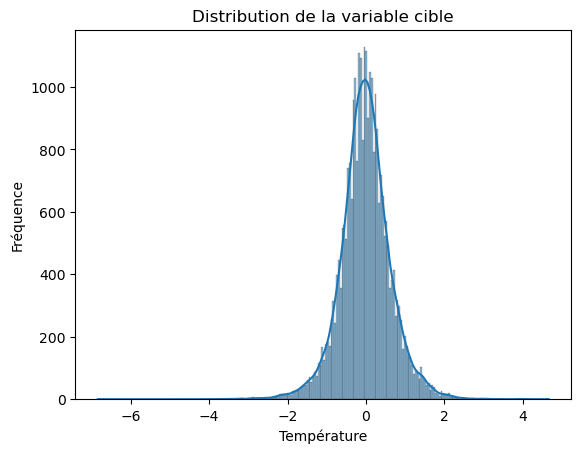

In [33]:
from scipy import stats
df_recent=df_recent.dropna()
res = stats.shapiro(df_recent['temperature'])
print(res)
sns.histplot(df, x='temperature', kde=True)
plt.title('Distribution de la variable cible')
plt.ylabel('Fréquence')
plt.xlabel('Température')
plt.show()



 Pour vérifier la normalité de la variable température, on a opté pour le test shapiro–Wilk .

 **Analyse :**

La p-value (=0.99)  est proche de 1 et supérieure à 0.05 donc la variable température suit une distribution normale.

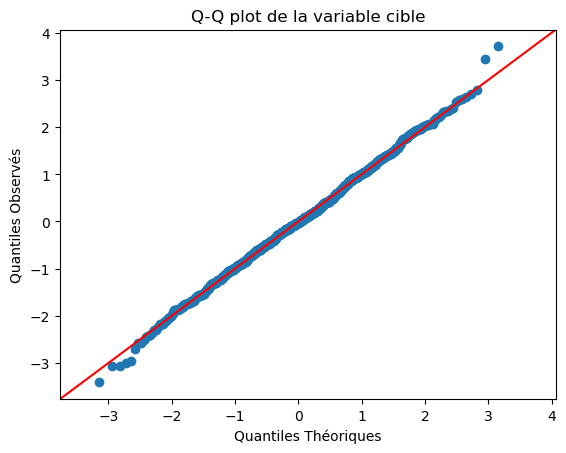

In [34]:
import statsmodels.api as sm
sm.qqplot(df_recent['temperature'], fit=True, line='45');
plt.title('Q-Q plot de la variable cible')
plt.ylabel('Quantiles Observés')
plt.xlabel('Quantiles Théoriques')
plt.show()


**Analyse :**

Le Q-Q plot nous a permis de montrer que les points de la variable température sont alignés sur la première bissectrice. Cette figure confirme que la distribution de cette variable suit une loi de distribution gaussienne normalisée.